# Table of Contents
1. [Compare Months](#Want-to-Compare-Monthly)
2. [Compare Days](#Compare-daily)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/sec1bestcase.csv")
sec1 = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']][1248:1462]
sec1 = sec1.dropna()
print(sec1.shape)
sec1new = np.array(sec1)
sec1new = pd.DataFrame(sec1new)
sec1new.columns = ['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']
sec1new

(143, 5)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
0,8/3/2015,97.494,45.56,376.5,278
1,8/4/2015,97.931,46.13,378.75,278
2,8/5/2015,97.958,45.55,383.25,280
3,8/7/2015,97.563,44.36,383.75,281
4,8/10/2015,97.159,45.66,401,282
5,8/11/2015,97.29,43.87,387.5,283
6,8/14/2015,96.52,43.11,375.5,280
7,8/17/2015,96.806,42.41,374.5,280
8,8/18/2015,97.04,43.12,377.25,278
9,8/19/2015,96.359,41.27,378.5,277


In [10]:
X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=150, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 13.408, test: 111.157
R^2 train: 0.975, test: 0.780


In [11]:
forest.feature_importances_

array([ 0.22770547,  0.67988465,  0.09240988])

In [12]:
ureapredicted = forest.predict(X)
ureapredicted = pd.DataFrame(ureapredicted)
ureapredicted.columns = ['Predicted Urea_Sec1_Suggest']
ureapredicted

,Predicted Urea_Sec1_Suggest
0,272.815667
1,269.092000
2,271.957222
3,272.094667
4,252.728602
5,259.238667
6,278.011111
7,276.621556
8,276.677778
9,277.024778


In [13]:
#how to add a new column, predicted urea
sec1new['Predicted Urea_Sec1_Suggest'] = ureapredicted
sec1new

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest
0,8/3/2015,97.494,45.56,376.5,278,272.815667
1,8/4/2015,97.931,46.13,378.75,278,269.092000
2,8/5/2015,97.958,45.55,383.25,280,271.957222
3,8/7/2015,97.563,44.36,383.75,281,272.094667
4,8/10/2015,97.159,45.66,401,282,252.728602
5,8/11/2015,97.29,43.87,387.5,283,259.238667
6,8/14/2015,96.52,43.11,375.5,280,278.011111
7,8/17/2015,96.806,42.41,374.5,280,276.621556
8,8/18/2015,97.04,43.12,377.25,278,276.677778
9,8/19/2015,96.359,41.27,378.5,277,277.024778


## Want to Compare Monthly
[Top](#table-of-contents)

In [22]:
#monthly predictions
oct_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][0:18]
nov_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][18:39]
dec_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][39:61]
jan_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][61:80]
feb_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][80:102]
mar_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][102:122]
apr_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][122:143]

In [23]:
#putting actual monthly urea avg into an array which I can then put into a dataframe so then I can plot
import numpy as np
actual_monthly_avg = np.array([oct_15['2monthurea'].mean(),
                               nov_15['2monthurea'].mean(),dec_15['2monthurea'].mean(),
                               jan_16['2monthurea'].mean(),feb_16['2monthurea'].mean(),
                               mar_16['2monthurea'].mean(),apr_16['2monthurea'].mean()])
actual_monthly_avg

array([ 276.77777778,  257.57142857,  253.36363636,  242.94736842,
        232.36363636,  204.15      ,  225.71428571])

In [24]:
pred_monthly_avg = np.array([oct_15['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_15['Predicted Urea_Sec1_Suggest'].mean(),dec_15['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_16['Predicted Urea_Sec1_Suggest'].mean(),feb_16['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_16['Predicted Urea_Sec1_Suggest'].mean(),apr_16['Predicted Urea_Sec1_Suggest'].mean()])
pred_monthly_avg

array([ 270.58757666,  258.11573217,  253.71418916,  242.07731925,
        232.95474364,  204.06001602,  225.46404425])

In [25]:
#putting the arrays into a dataframe
from datetime import datetime
actual_monthly_avg = pd.DataFrame(actual_monthly_avg)
pred_monthly_avg = pd.DataFrame(pred_monthly_avg)
monthly_date = ['10/2015','11/2015','12/2015','1/2016','2/2016','3/2016','4/2016']
monthly_date = pd.to_datetime(monthly_date)
monthly_date.strftime('%b-%y')
monthly_date = pd.DataFrame(monthly_date)
monthly_date.columns = ['Monthly_Date']

In [26]:
upperbound = pred_monthly_avg + pred_monthly_avg.std()
lowerbound = pred_monthly_avg - pred_monthly_avg.std()

In [27]:
monthly_date['Actual_Monthly_Avg'] = actual_monthly_avg
monthly_date['Pred_Monthly_Avg'] = pred_monthly_avg
monthly_date['Upper_Bound'] = upperbound
monthly_date['Lower_Bound'] = lowerbound
monthly_avg = monthly_date
print(monthly_avg.dtypes)
monthly_avg

Monthly_Date          datetime64[ns]
Actual_Monthly_Avg           float64
Pred_Monthly_Avg             float64
Upper_Bound                  float64
Lower_Bound                  float64
dtype: object


,Monthly_Date,Actual_Monthly_Avg,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2015-10-01,276.777778,270.587577,292.955107,248.220046
1,2015-11-01,257.571429,258.115732,280.483263,235.748201
2,2015-12-01,253.363636,253.714189,276.081720,231.346658
3,2016-01-01,242.947368,242.077319,264.444850,219.709788
4,2016-02-01,232.363636,232.954744,255.322274,210.587213
5,2016-03-01,204.150000,204.060016,226.427547,181.692485
6,2016-04-01,225.714286,225.464044,247.831575,203.096514


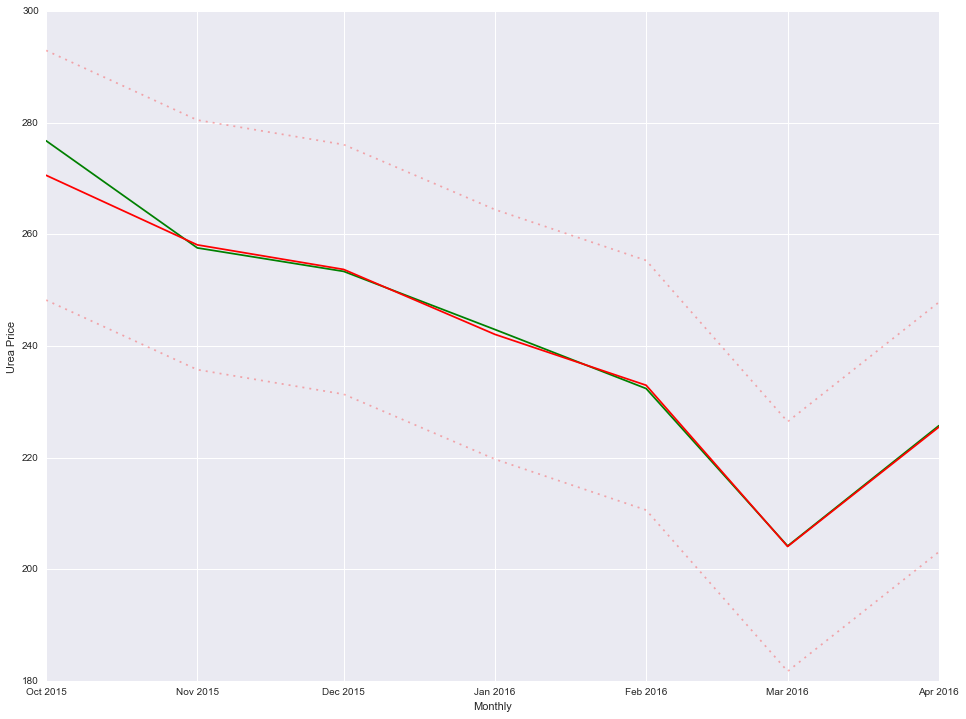

In [28]:
#basic plot of monthly avg actual vs predicted
import matplotlib.pyplot as plt
%matplotlib inline

x = (monthly_avg['Monthly_Date'])
y1 = (monthly_avg['Actual_Monthly_Avg'])
y2 = (monthly_avg['Pred_Monthly_Avg'])
lowerbound2 = (monthly_avg['Lower_Bound'])
upperbound2 = (monthly_avg['Upper_Bound'])

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.plot(x,lowerbound2,'r--',dashes=(2,5),alpha=0.3)
plt.plot(x,upperbound2,'r--',dashes=(2,5),alpha=0.3)
#plt.fill_between(x,lowerbound2,upperbound2,color='red',alpha=0.5)
plt.xlabel('Monthly')
plt.ylabel('Urea Price')
plt.show()

In [30]:
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:1769]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:1769]
newpred2 

,latedate,Spotdollar,2monthcrude,2monthcorn
1461,3/1/2016,98.352,36.15,355.75
1462,3/2/2016,98.214,36.30,356.25
1463,3/3/2016,97.592,36.33,356.50
1464,3/4/2016,97.340,37.75,358.25
1465,3/5/2016,97.340,37.75,358.25
1466,3/6/2016,97.340,37.75,358.25
1467,3/7/2016,97.071,39.82,359.00
1468,3/8/2016,97.209,38.42,360.50
1469,3/9/2016,97.173,40.07,359.50
1470,3/10/2016,96.066,39.40,362.75


In [31]:
#new predictions
newpred_predicted = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
newpred2

,latedate,Spotdollar,2monthcrude,2monthcorn,Predicted Urea_Sec1_Suggest
0,3/1/2016,98.352,36.15,355.75,223.361
1,3/2/2016,98.214,36.3,356.25,227.294
2,3/3/2016,97.592,36.33,356.5,228.746
3,3/4/2016,97.34,37.75,358.25,230.775
4,3/5/2016,97.34,37.75,358.25,230.775
5,3/6/2016,97.34,37.75,358.25,230.775
6,3/7/2016,97.071,39.82,359,268.503
7,3/8/2016,97.209,38.42,360.5,232.96
8,3/9/2016,97.173,40.07,359.5,269.19
9,3/10/2016,96.066,39.4,362.75,267.07


In [34]:
#monthly predictions for may_16 to feb_17
may_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][0:31]
jun_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][31:61]
jul_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][61:92]
aug_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][92:122]
sep_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][122:153]
oct_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][153:184]
nov_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][184:214]
dec_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][214:245]
jan_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][245:275]
feb_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][275:306]

In [35]:
new_pred_monthly_avg = np.array([may_16['Predicted Urea_Sec1_Suggest'].mean(),jun_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_16['Predicted Urea_Sec1_Suggest'].mean(),aug_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_16['Predicted Urea_Sec1_Suggest'].mean(),oct_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_16['Predicted Urea_Sec1_Suggest'].mean(),dec_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_17['Predicted Urea_Sec1_Suggest'].mean(),feb_17['Predicted Urea_Sec1_Suggest'].mean()])
new_pred_monthly_avg

array([ 261.22523572,  275.67465926,  255.53112882,  254.39375637,
        254.01740104,  253.34901434,  253.33944444,  253.33944444,
        253.33944444,  253.33944444])

In [36]:
new_pred_monthly_avg = pd.DataFrame(new_pred_monthly_avg)
new_monthly_date = ['5/2016','6/2016','7/2016','8/2016','9/2016','10/2016','11/2016','12/2016','1/2017','2/2017']
new_monthly_date = pd.to_datetime(new_monthly_date)
new_monthly_date.strftime('%b-%y')
new_monthly_date = pd.DataFrame(new_monthly_date)
new_monthly_date.columns = ['Monthly_Date']
new_upperbound = new_pred_monthly_avg + new_pred_monthly_avg.std()
new_lowerbound = new_pred_monthly_avg - new_pred_monthly_avg.std()
new_monthly_date['Pred_Monthly_Avg'] = new_pred_monthly_avg
new_monthly_date['Upper_Bound'] = new_upperbound
new_monthly_date['Lower_Bound'] = new_lowerbound
new_monthly_avg = new_monthly_date
print(new_monthly_avg.dtypes)
new_monthly_avg

Monthly_Date        datetime64[ns]
Pred_Monthly_Avg           float64
Upper_Bound                float64
Lower_Bound                float64
dtype: object


,Monthly_Date,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2016-05-01,261.225236,268.302344,254.148128
1,2016-06-01,275.674659,282.751767,268.597551
2,2016-07-01,255.531129,262.608237,248.454021
3,2016-08-01,254.393756,261.470864,247.316648
4,2016-09-01,254.017401,261.094509,246.940293
5,2016-10-01,253.349014,260.426122,246.271906
6,2016-11-01,253.339444,260.416552,246.262337
7,2016-12-01,253.339444,260.416552,246.262337
8,2017-01-01,253.339444,260.416552,246.262337
9,2017-02-01,253.339444,260.416552,246.262337


In [37]:
frames = [monthly_date,new_monthly_date]
combined = pd.concat(frames)
combined

,Actual_Monthly_Avg,Lower_Bound,Monthly_Date,Pred_Monthly_Avg,Upper_Bound
0,276.777778,248.220046,2015-10-01,270.587577,292.955107
1,257.571429,235.748201,2015-11-01,258.115732,280.483263
2,253.363636,231.346658,2015-12-01,253.714189,276.081720
3,242.947368,219.709788,2016-01-01,242.077319,264.444850
4,232.363636,210.587213,2016-02-01,232.954744,255.322274
5,204.150000,181.692485,2016-03-01,204.060016,226.427547
6,225.714286,203.096514,2016-04-01,225.464044,247.831575
0,NaN,254.148128,2016-05-01,261.225236,268.302344
1,NaN,268.597551,2016-06-01,275.674659,282.751767
2,NaN,248.454021,2016-07-01,255.531129,262.608237


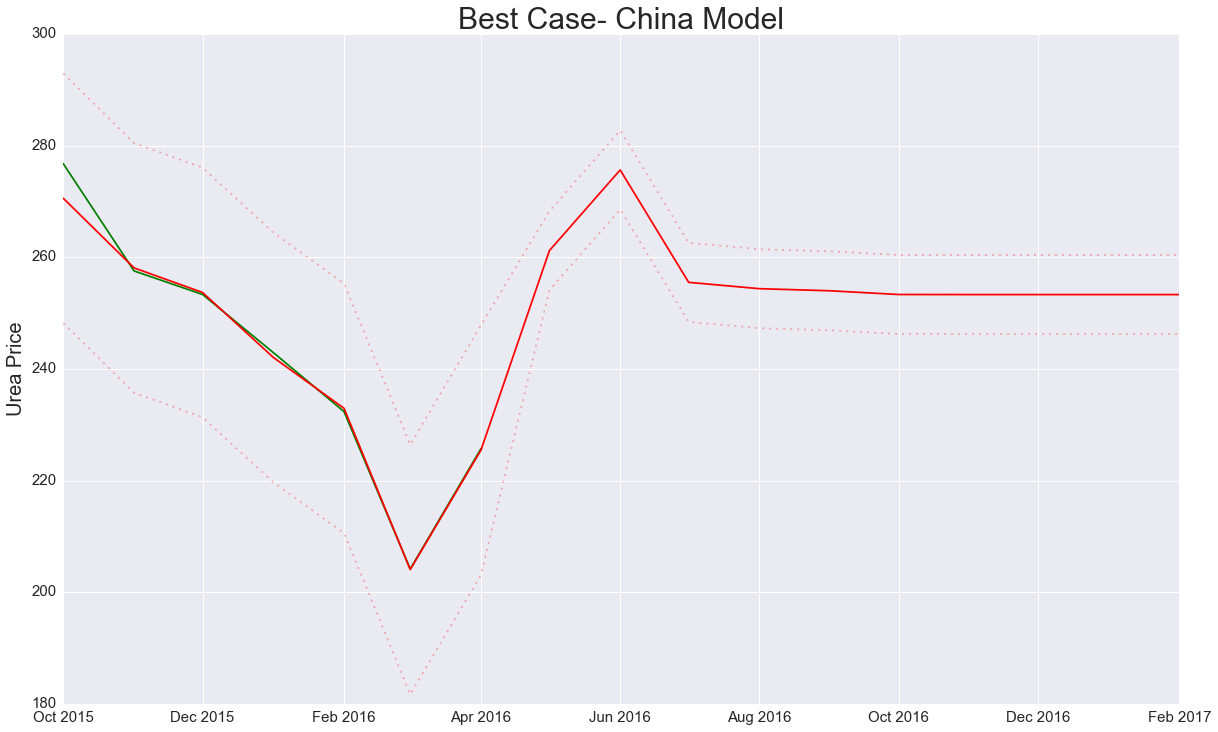

In [38]:

x = (combined['Monthly_Date'])
y1 = (combined['Actual_Monthly_Avg'])
y2 = (combined['Pred_Monthly_Avg'])
lowerboundcom = (combined['Lower_Bound'])
upperboundcom = (combined['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,lowerboundcom,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x,upperboundcom,'r--',dashes=(2,5),alpha=0.3)

#plt.ylabel('Urea Price')
ax.set_title('Best Case- China Model', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

## Compare daily 
[Top](#table-of-contents)

In [39]:
sec1whole = sec1new
sec1whole['Predicted Urea_Sec1_Suggest'].describe()

count    143.000000
mean     240.651312
std       21.971236
min      191.153333
25%      227.494307
50%      243.193333
75%      254.647248
max      278.011111
Name: Predicted Urea_Sec1_Suggest, dtype: float64

In [40]:
upperbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] + sec1whole['Predicted Urea_Sec1_Suggest'].std()
lowerbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] - sec1whole['Predicted Urea_Sec1_Suggest'].std()
sec1whole['Upper_Bound'] = upperbound_whole
sec1whole['Lower_Bound'] = lowerbound_whole
sec1whole

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest,Upper_Bound,Lower_Bound
0,8/3/2015,97.494,45.56,376.5,278,272.815667,294.786902,250.844431
1,8/4/2015,97.931,46.13,378.75,278,269.092000,291.063236,247.120764
2,8/5/2015,97.958,45.55,383.25,280,271.957222,293.928458,249.985986
3,8/7/2015,97.563,44.36,383.75,281,272.094667,294.065902,250.123431
4,8/10/2015,97.159,45.66,401,282,252.728602,274.699838,230.757366
5,8/11/2015,97.29,43.87,387.5,283,259.238667,281.209902,237.267431
6,8/14/2015,96.52,43.11,375.5,280,278.011111,299.982347,256.039875
7,8/17/2015,96.806,42.41,374.5,280,276.621556,298.592791,254.650320
8,8/18/2015,97.04,43.12,377.25,278,276.677778,298.649014,254.706542
9,8/19/2015,96.359,41.27,378.5,277,277.024778,298.996014,255.053542


In [41]:
#new predictions daily
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:1769]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:1769]
newpred_predicted_whole = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred_whole = pd.DataFrame(newpred_predicted_whole)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred_whole
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
upperbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] + newpred2['Predicted Urea_Sec1_Suggest'].std()
lowerbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] - newpred2['Predicted Urea_Sec1_Suggest'].std()
newpred2['Upper_Bound'] = upperbound_wholenew
newpred2['Lower_Bound'] = lowerbound_wholenew
newpred2['Predicted Urea_Sec1_Suggest'].mean()


256.72310741364538

In [42]:
#this shows that I need to change the lastdate object to a date
frames_whole = [sec1whole,newpred2]
combined_whole = pd.concat(frames_whole)
combined_whole.dtypes

2monthcorn                     object
2monthcrude                    object
2monthurea                     object
Lower_Bound                    object
Predicted Urea_Sec1_Suggest    object
Spotdollar                     object
Upper_Bound                    object
latedate                       object
dtype: object

In [43]:
#changes lastdate column to datetime format
from datetime import datetime
new_date = combined_whole[['latedate']]
combined_whole['latedate'] = pd.to_datetime(combined_whole['latedate'])
print(new_date.dtypes)
combined_whole.tail()


latedate    object
dtype: object


,2monthcorn,2monthcrude,2monthurea,Lower_Bound,Predicted Urea_Sec1_Suggest,Spotdollar,Upper_Bound,latedate
301,448.9,69.6,NaN,244.198,253.339,91.1,262.481,2016-12-27
302,449.2,69.7,NaN,244.198,253.339,91.1,262.481,2016-12-28
303,449.5,69.8,NaN,244.198,253.339,91,262.481,2016-12-29
304,449.7,69.9,NaN,244.198,253.339,91,262.481,2016-12-30
305,450,70,NaN,244.198,253.339,91,262.481,2016-12-31


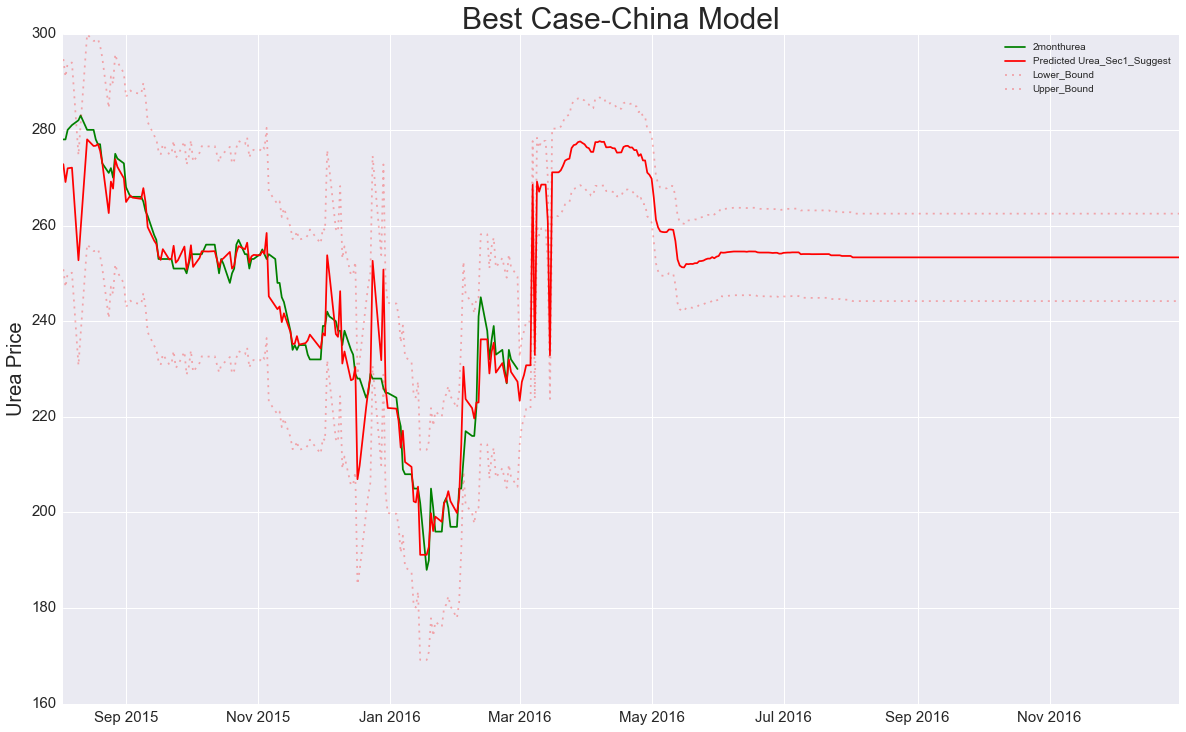

In [44]:
x_whole = (combined_whole['latedate'])
y1_whole = (combined_whole['2monthurea'])
y2_whole = (combined_whole['Predicted Urea_Sec1_Suggest'])
lowerbound_whole = (combined_whole['Lower_Bound'])
upperbound_whole = (combined_whole['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x_whole,y1_whole,'g')
ax.plot(x_whole,y2_whole,'r')
ax.plot(x_whole,lowerbound_whole,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x_whole,upperbound_whole,'r--',dashes=(2,5),alpha=0.3)

ax.set_title('Best Case-China Model', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
#ax.set_xticklabels(x_whole,rotation=30)
plt.show()